In [87]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [88]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [89]:
# df_stats = pd.read_csv('./MCI/statistics/70031_R_1_1_2020_0_0_0_V012_mode_1_odos_0_scan_12_stats_summary.csv')
df = pd.read_csv('./MCI/eye_motion_trace/70031_R_1_1_2020_0_0_0_V012_mode_1_odos_0_scan_12_trace_filtered.csv')

In [90]:
df_reindexed = df.set_index('time[s]')
df_reindexed

,horizontal_motion[pixel],vertical_motion[pixel],horizontal_motion[deg],vertical_motion[deg],horizontal_motion_raw[pixel],vertical_motion_raw[pixel],horizontal_motion_raw[deg],vertical_motion_raw[deg]
time[s],,,,,,,,
0.0000,-0.6596,26.8729,-0.0081,0.2460,-1,27,-0.0122,0.2472
0.0021,-0.6079,24.3019,-0.0074,0.2225,-1,-1,-0.0122,-0.0092
0.0042,-0.5531,21.7714,-0.0068,0.1993,-1,-1,-0.0122,-0.0092
0.0063,-0.4955,19.3151,-0.0060,0.1768,-1,-1,-0.0122,-0.0092
0.0083,-0.4357,16.9603,-0.0053,0.1553,-1,-1,-0.0122,-0.0092
...,...,...,...,...,...,...,...,...
9.9896,-44.4172,-6.9419,-0.5422,-0.0636,-44,6,-0.5371,0.0549
9.9917,-44.3411,-8.1114,-0.5413,-0.0743,-44,7,-0.5371,0.0641
9.9938,-44.2662,-9.2695,-0.5404,-0.0849,-43,7,-0.5249,0.0641


In [91]:
def plot_time_series(times, values, y_label = ''):
    # Plot the original series
    plt.figure(figsize=(12, 6))
    plt.plot(times, values, color='blue', label=y_label)

    # plt.title('')
    plt.xlabel('Time[s]')
    plt.ylabel(y_label)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

In [92]:
df.columns

Index(['time[s]', 'horizontal_motion[pixel]', 'vertical_motion[pixel]',
       'horizontal_motion[deg]', 'vertical_motion[deg]',
       'horizontal_motion_raw[pixel]', 'vertical_motion_raw[pixel]',
       'horizontal_motion_raw[deg]', 'vertical_motion_raw[deg]'],
      dtype='object')

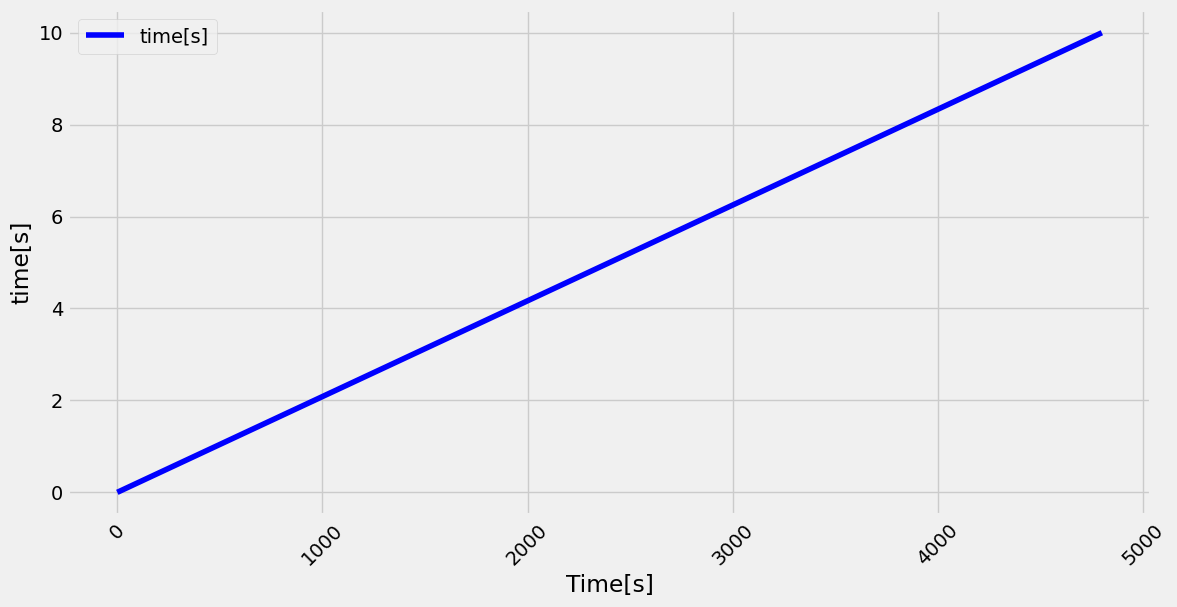

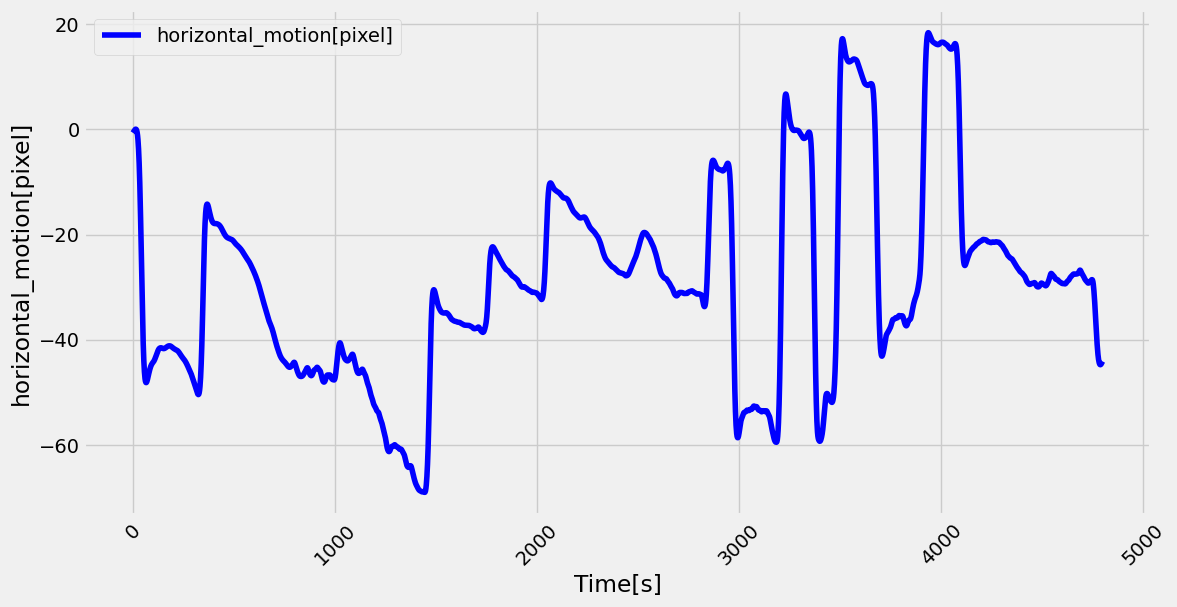

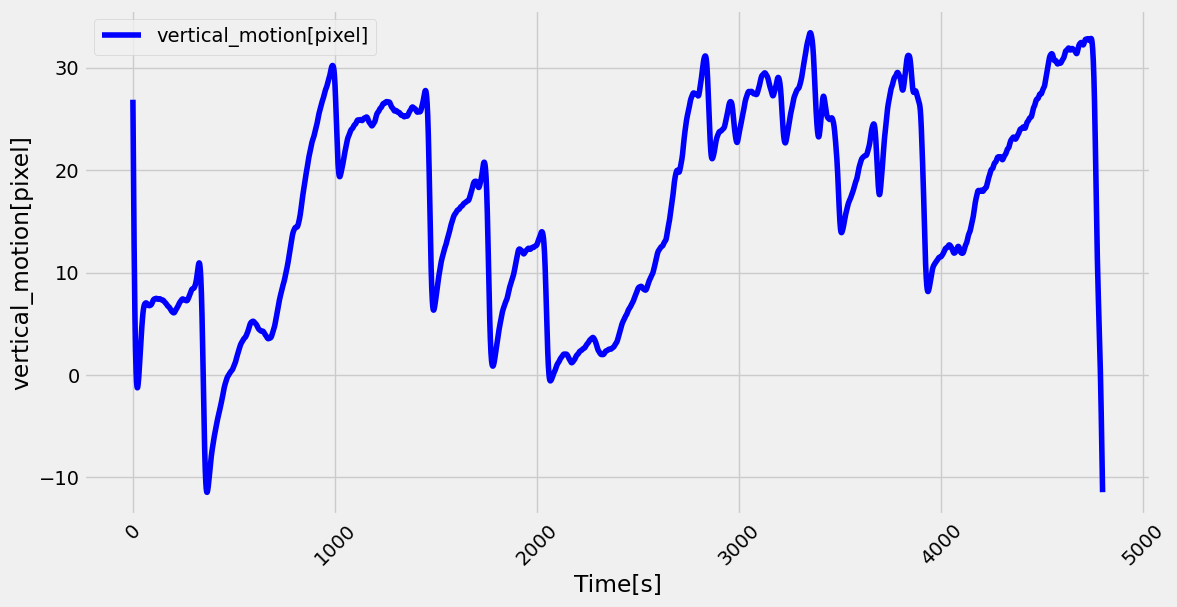

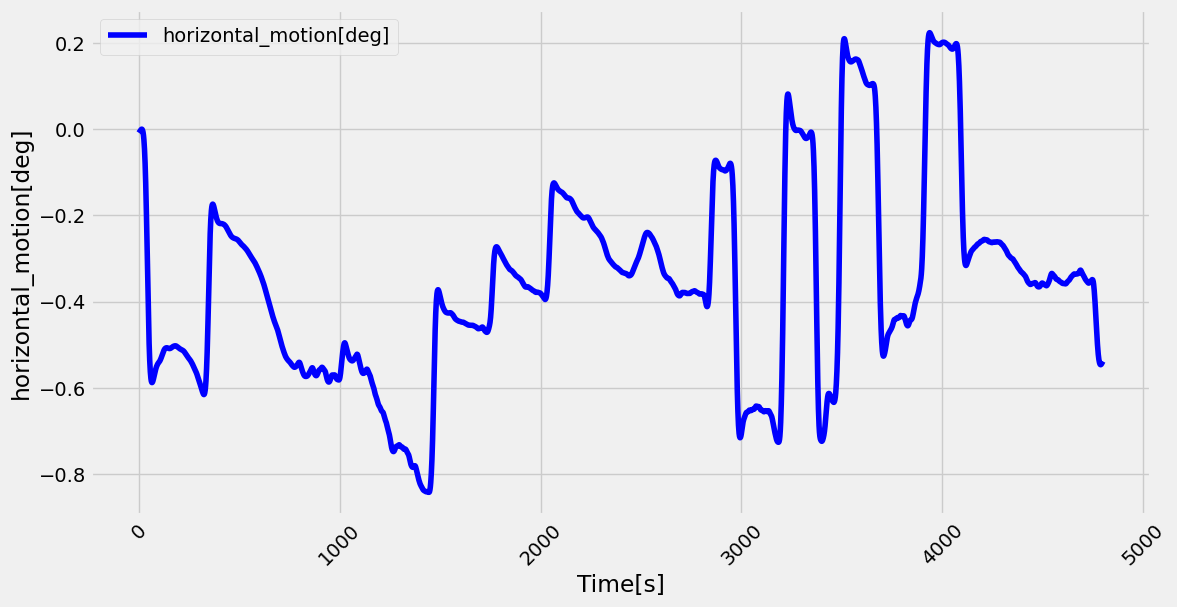

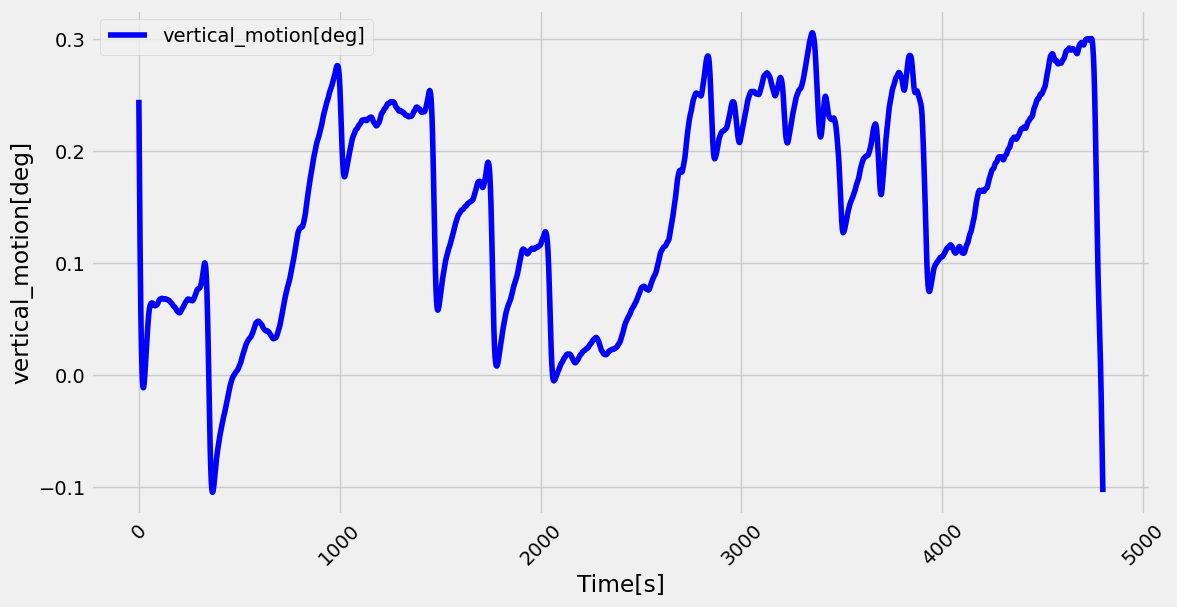

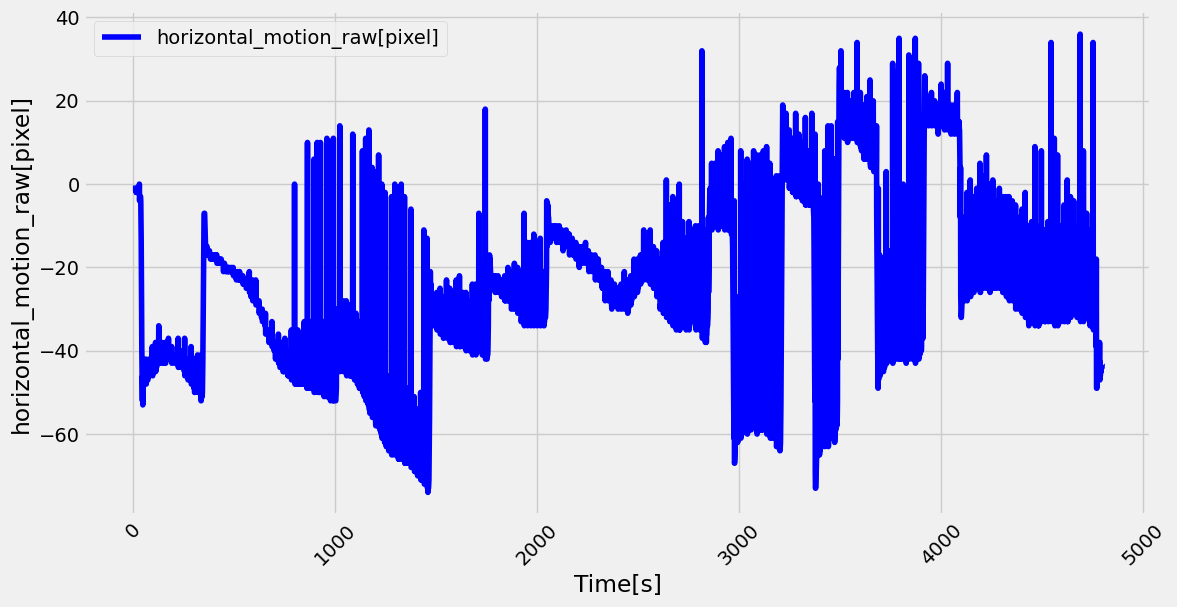

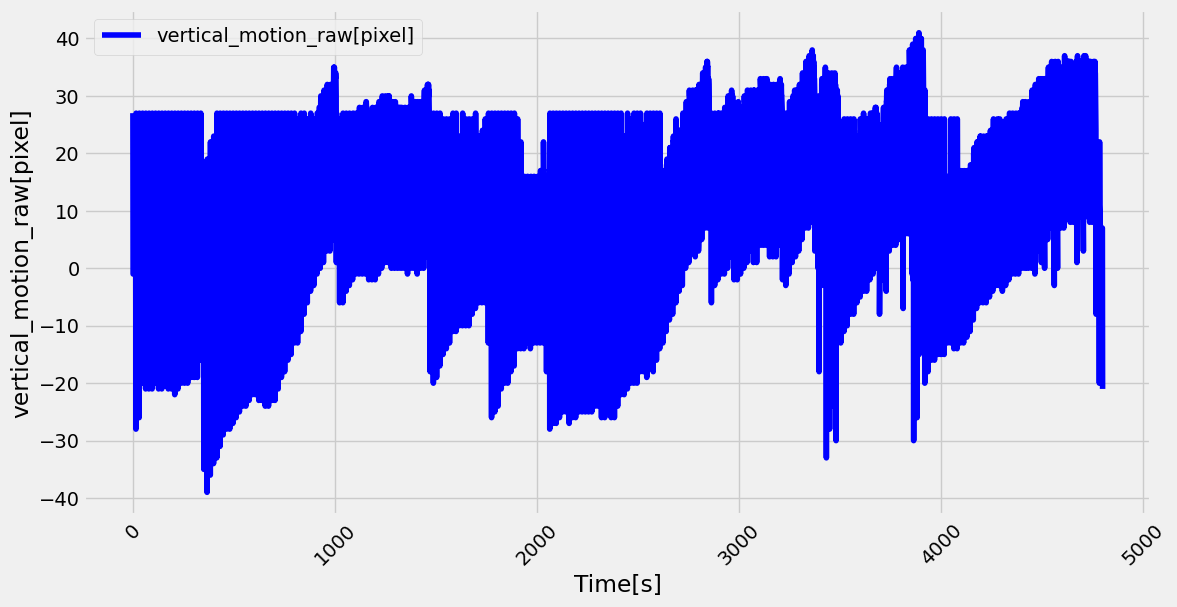

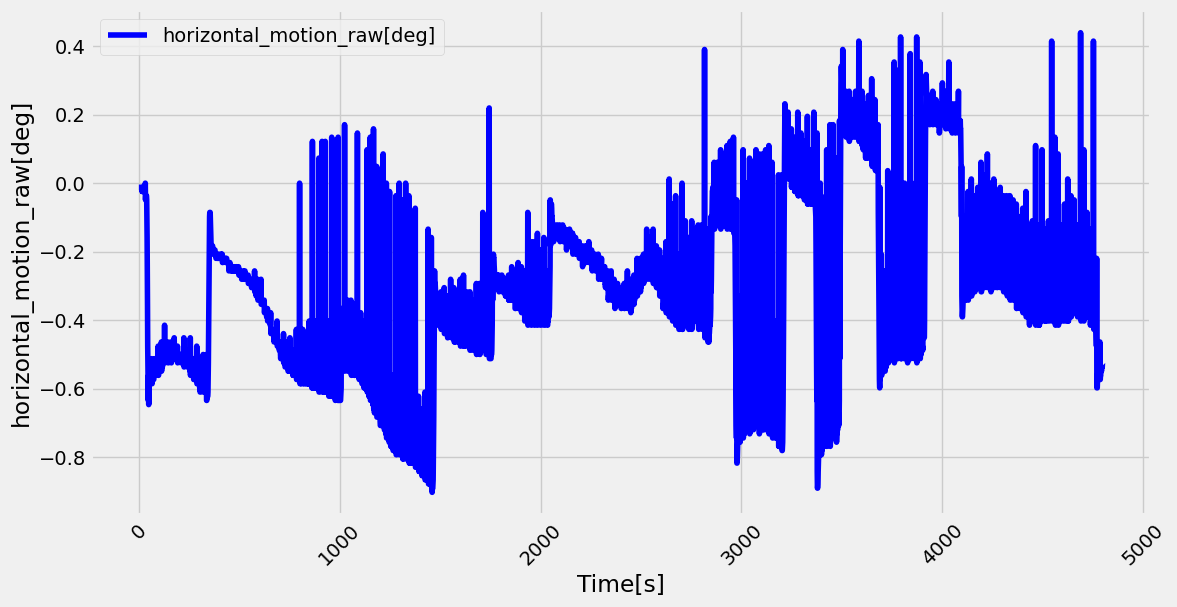

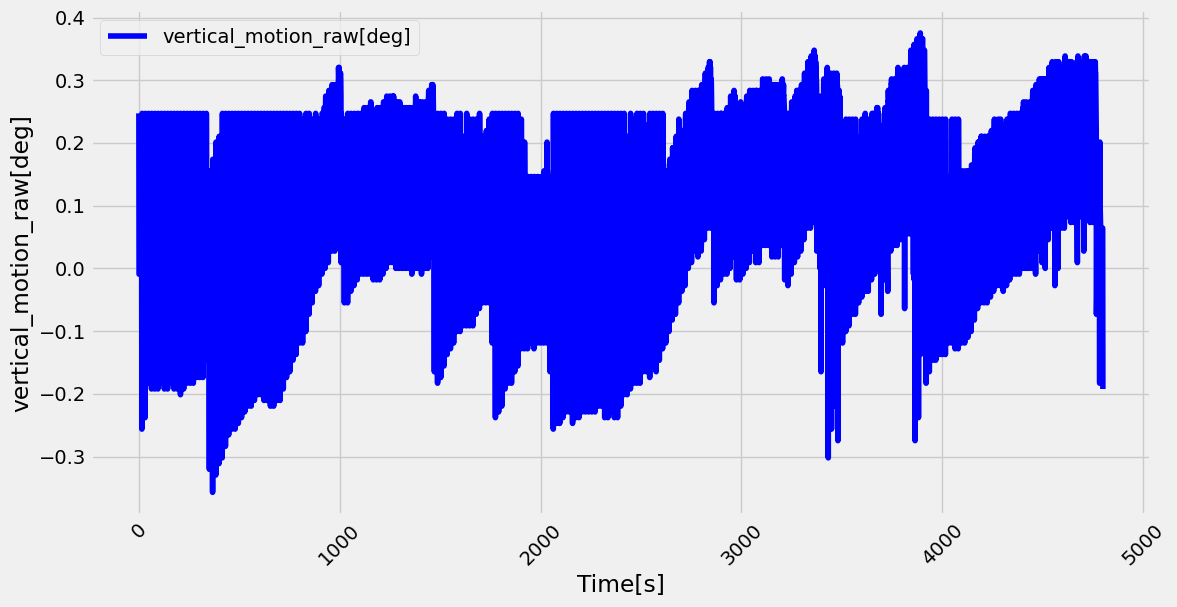

In [93]:
for column in df.columns:
    plot_time_series(df.index, df[column], column)

In [94]:
df = df[['horizontal_motion[deg]']]
df

,horizontal_motion[deg]
0,-0.0081
1,-0.0074
2,-0.0068
3,-0.0060
4,-0.0053
...,...
4795,-0.5422
4796,-0.5413
4797,-0.5404
4798,-0.5395


In [95]:
# [(480, 640, 3)]
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
horizontal_motion[deg],4800.0,-0.35915,0.230889,-0.8429,-0.528125,-0.35915,-0.258975,0.2244


In [96]:
# df_std = (df - train_mean) / train_std
# df_std = df_std.melt(var_name='Column', value_name='Normalized')
# plt.figure(figsize=(12, 6))
# ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
# _ = ax.set_xticklabels(df.keys(), rotation=90)

In [252]:
def plot_predictions(Ttest, TPred, test,predicted, title='horizontal_motion[deg]', additive = True):
    timesT = [0.0021 * i for i in range(Ttest)]
    if additive:
        timesP = [0.0021 * (i + Ttest) for i in range(TPred)]
    else:
        timesP = [0.0021 * i for i in range(TPred)]

    # print(timesT[0])
    # print(timesP[0])
    
    plt.plot(timesT, test, color='red',label='Real')
    plt.plot(timesP, predicted, color='blue',label='Predicted')
    plt.title('Predicted Time Series')
    plt.xlabel('Time')
    plt.ylabel('horizontal_motion[deg]')
    plt.legend()
    plt.show()

def plot_accuracy(Ttest, TPred, test,predicted, additive = True):
    print(type(test))
    timesT = [0.0021 * i for i in range(Ttest)]
    plt.plot(timesT, test, color='red',label='Real')
    plt.plot(timesT, predicted, color='blue',label='Predicted')
    plt.title('Expected vs. Predicted')
    plt.xlabel('Time')
    plt.ylabel('horizontal_motion[deg]')
    plt.legend()
    plt.show()

def plot_all_in_one(Ttest, TPred, test, predicted, actual, title='horizontal_motion[deg]', additive = True):
    timesT = [0.0021 * i for i in range(Ttest)]
    if additive:
        timesP = [0.0021 * (i + Ttest) for i in range(TPred)]
    else:
        timesP = [0.0021 * i for i in range(TPred)]

    # print(timesT[0])
    # print(timesP[0])
    
    plt.plot(timesT, test, color='red',label='Real')
    plt.plot(timesP, predicted, color='blue',label='Predicted')
    plt.plot(timesP, actual, color='green',label='Actual')
    
    plt.title('Expected vs. Predicted Over Time Series')
    plt.xlabel('Time')
    plt.ylabel('horizontal_motion[deg]')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [98]:
print(len(df))
print(0.8 * len(df))
print(type(df))
df_arr = np.array(df)
df_arr

4800
3840.0
<class 'pandas.core.frame.DataFrame'>


array([[-0.0081],
       [-0.0074],
       [-0.0068],
       ...,
       [-0.5404],
       [-0.5395],
       [-0.5387]])

In [99]:
divider = 3850
training_set = df_arr[:divider]
test_set = df_arr[divider:]

In [100]:
sc = MinMaxScaler(feature_range=(0,1)) #Transform to 0-1 domain
training_set_scaled = sc.fit_transform(training_set)

In [101]:
X_train = []
y_train = []

for i in range(60,len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

print(X_train.shape, y_train.shape)

(3790, 60) (3790,)


In [102]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(60, 1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

regressor.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 60, 50)            10400     
                                                                 
 dropout_12 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_13 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_13 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_14 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_14 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_15 (LSTM)              (None, 50)               

In [ ]:
# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
history = regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
119/119 [==============================] - 6s 34ms/step - loss: 0.0173
Epoch 2/50
119/119 [==============================] - 4s 35ms/step - loss: 0.0071
Epoch 3/50
119/119 [==============================] - 4s 35ms/step - loss: 0.0049
Epoch 4/50
119/119 [==============================] - 4s 35ms/step - loss: 0.0038
Epoch 5/50
119/119 [==============================] - 4s 34ms/step - loss: 0.0033
Epoch 6/50
119/119 [==============================] - 4s 35ms/step - loss: 0.0028
Epoch 7/50
119/119 [==============================] - 4s 35ms/step - loss: 0.0024
Epoch 8/50
119/119 [==============================] - 4s 35ms/step - loss: 0.0022
Epoch 9/50
119/119 [==============================] - 4s 35ms/step - loss: 0.0021
Epoch 10/50
119/119 [==============================] - 4s 36ms/step - loss: 0.0018
Epoch 11/50
119/119 [==============================] - 4s 35ms/step - loss: 0.0017
Epoch 12/50
119/119 [==============================] - 4s 36ms/step - loss: 0.0017
Epoch 13/50
1

In [145]:
inputs = test_set
inputs = inputs.reshape(-1,1)
expected = inputs[60:len(inputs)]

In [180]:
print(inputs.shape)

(950, 1)


In [105]:
print(inputs[0:5])

[[-0.4378]
 [-0.4361]
 [-0.4342]
 [-0.432 ]
 [-0.4296]]


In [106]:
inputs = sc.transform(inputs)

In [107]:
print(inputs[0:5])

[[0.38456427]
 [0.38617809]
 [0.38798177]
 [0.39007025]
 [0.39234859]]


In [185]:
X_test = []
for i in range(60,len(inputs)):
    X_test.append(inputs[i-60:i,0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
print(X_test.shape)

# pred = regressor.predict(X_test)
# pred = sc.inverse_transform(pred)

(890, 60, 1)


<class 'numpy.ndarray'>


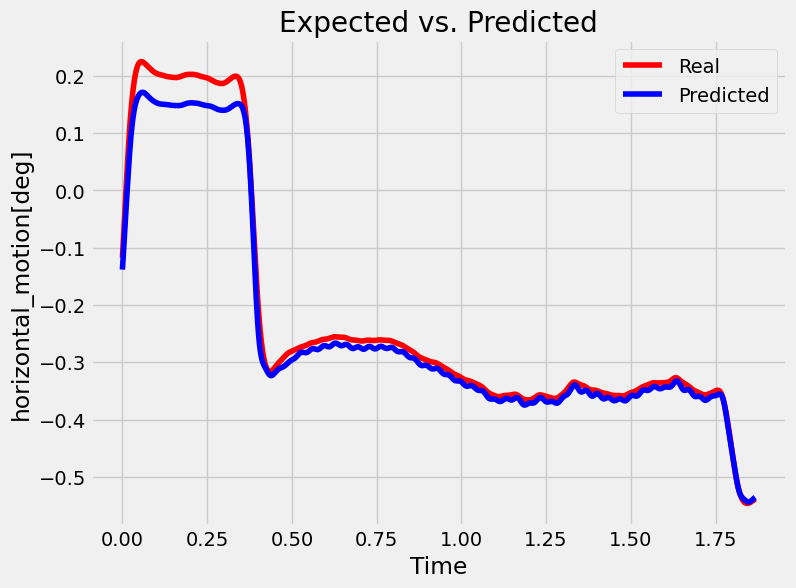

In [253]:
plot_accuracy(len(expected), len(pred), expected, pred, False)

In [120]:
print(test_set[0:5])

[[-0.4378]
 [-0.4361]
 [-0.4342]
 [-0.432 ]
 [-0.4296]]


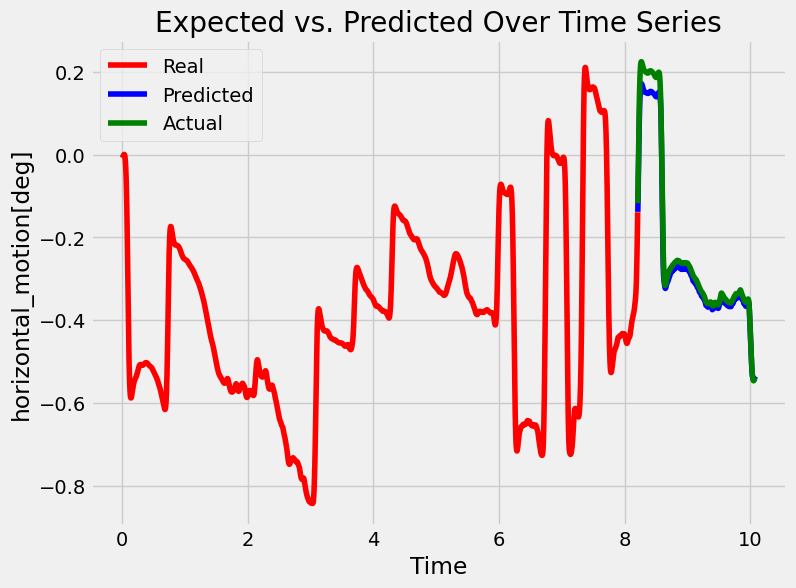

In [140]:
prev_history = list(training_set) + list(test_set[0:60])
plot_all_in_one(len(prev_history), len(pred), prev_history, pred, expected, True)

In [114]:
return_rmse(expected, pred)

The root mean squared error is 0.023170171347346454.


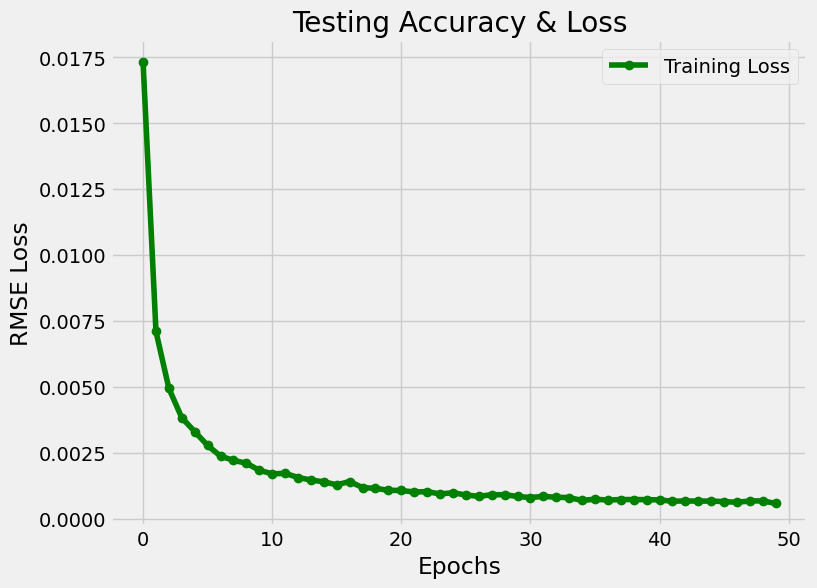

In [122]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1)
train_loss = history.history['loss']

ax.plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax.set_title('Testing Accuracy & Loss')
ax.legend()
ax.set_xlabel("Epochs")
ax.set_ylabel("RMSE Loss")
plt.show()

In [203]:
%%capture
generated_num = 4800

all_frames = expected
all_frames = sc.transform(all_frames)
all_frames = list(all_frames)

for i in range(generated_num):
    window = np.array([all_frames[-60:]])
    window = np.reshape(window, (window.shape[0],window.shape[1],1))
    res = regressor.predict(window)
    all_frames.append(res[0])

# X_test = np.array(X_test)
# X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

# pred = regressor.predict(X_test)
# pred = sc.inverse_transform(pred)

In [204]:
all_frames = sc.inverse_transform(all_frames)

In [183]:
print(X_test.shape)

(890, 60, 1)


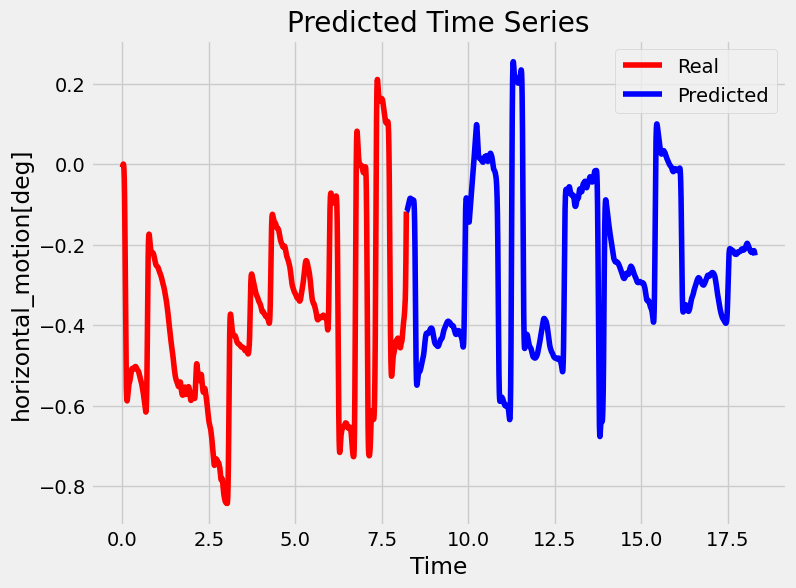

In [242]:
prev_history = list(training_set) + list(test_set[0:61])
plot_predictions(len(prev_history), len(all_frames), prev_history, all_frames, True)